In [1]:
import numpy as np
import pandas as pd

In [2]:
import statistics

In [3]:
df = pd.read_csv(r"D:\Dokumen\Python\Data Engineering 1\Wine.csv")

In [4]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
Mg = df['Magnesium']

In [6]:
z_numerator = (Mg - statistics.mean(Mg))

In [7]:
z_denominator = statistics.stdev(Mg)

In [8]:
z = z_numerator/z_denominator

In [9]:
z

0      1.908522
1      0.018094
2      0.088110
3      0.928300
4      1.278379
         ...   
173   -0.331985
174    0.158126
175    1.418411
176    1.418411
177   -0.261969
Name: Magnesium, Length: 178, dtype: float64

In [10]:
from statsmodels.multivariate.manova import MANOVA

In [11]:
model = MANOVA.from_formula('Magnesium + Alcohol ~ Customer_Segment', data = df)

In [12]:
print(model.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0213 2.0000 175.0000 4015.1466 0.0000
         Pillai's trace  0.9787 2.0000 175.0000 4015.1466 0.0000
 Hotelling-Lawley trace 45.8874 2.0000 175.0000 4015.1466 0.0000
    Roy's greatest root 45.8874 2.0000 175.0000 4015.1466 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
       Customer_Segment    Value  Num DF  Den DF  F Value Pr > F
----------------------------------------------------------------
             Wilks' lambda 0.8767 2.0000 175.0000 12.3114 0.0000
            Pillai's trace 0.1233 2.0000 175.

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [14]:
x1 = df.drop(columns = 'Customer_Segment')
x1 = x1.to_numpy()
print(x1)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [15]:
y1 = df['Customer_Segment']
y1 = y1.to_numpy()
print(y1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [16]:
ida = LinearDiscriminantAnalysis(n_components=1)

In [17]:
model = ida.fit(x1,y1)

In [18]:
scores = ida.transform(x1)

In [20]:
print(ida.coef_)

[[ 2.85542117e+00 -4.89788666e-02  5.23156990e+00 -7.77422596e-01
   6.62170776e-03 -2.16976970e+00  4.85310738e+00  2.36037857e+00
  -9.78422688e-01 -7.86790206e-01  2.35758911e-01  4.04832027e+00
   1.40369442e-02]
 [-2.12348259e+00 -7.68274072e-01 -5.77105386e+00  3.49607787e-01
   1.31672488e-03  3.03762476e-02  1.34898232e+00  4.15204322e+00
   7.48631160e-01 -6.54459561e-01  3.81286126e+00 -3.42724866e-02
  -6.83988909e-03]
 [-3.68803859e-01  1.19660859e+00  2.10587916e+00  4.38453756e-01
  -1.00868380e-02  2.62207706e+00 -7.96064750e+00 -9.04286258e+00
   9.52942959e-02  1.93515106e+00 -5.92964428e+00 -4.92536562e+00
  -7.13640797e-03]]


In [21]:
print(ida.scalings_)

[[-4.03399781e-01  8.71793070e-01]
 [ 1.65254596e-01  3.05379732e-01]
 [-3.69075256e-01  2.34584975e+00]
 [ 1.54797889e-01 -1.46380765e-01]
 [-2.16349626e-03 -4.62756490e-04]
 [ 6.18052068e-01 -3.22128171e-02]
 [-1.66119123e+00 -4.91998054e-01]
 [-1.49581844e+00 -1.63095380e+00]
 [ 1.34092628e-01 -3.07087578e-01]
 [ 3.55055710e-01  2.53230686e-01]
 [-8.18036073e-01 -1.51563450e+00]
 [-1.15755938e+00  5.11839665e-02]
 [-2.69120640e-03  2.85298464e-03]]


In [22]:
print(scores)

[[-4.70024401]
 [-4.30195811]
 [-3.42071952]
 [-4.20575366]
 [-1.50998168]
 [-4.51868934]
 [-4.52737794]
 [-4.14834781]
 [-3.86082876]
 [-3.36662444]
 [-4.80587907]
 [-3.42807646]
 [-3.66610246]
 [-5.58824635]
 [-5.50131449]
 [-3.18475189]
 [-3.28936988]
 [-2.99809262]
 [-5.24640372]
 [-3.13653106]
 [-3.57747791]
 [-1.69077135]
 [-4.83515033]
 [-3.09588961]
 [-3.32164716]
 [-2.14482223]
 [-3.9824285 ]
 [-2.68591432]
 [-3.56309464]
 [-3.17301573]
 [-2.99626797]
 [-3.56866244]
 [-3.38506383]
 [-3.5275375 ]
 [-2.85190852]
 [-2.79411996]
 [-2.75808511]
 [-2.17734477]
 [-3.02926382]
 [-3.27105228]
 [-2.92065533]
 [-2.23721062]
 [-4.69972568]
 [-1.23036133]
 [-2.58203904]
 [-2.58312049]
 [-3.88887889]
 [-3.44975356]
 [-2.34223331]
 [-3.52062596]
 [-3.21840912]
 [-4.38214896]
 [-4.36311727]
 [-3.51917293]
 [-3.12277475]
 [-1.8024054 ]
 [-2.87378754]
 [-3.61690518]
 [-3.73868551]
 [ 1.58618749]
 [ 0.79967216]
 [ 2.38015446]
 [-0.45917726]
 [-0.50726885]
 [ 0.39398359]
 [-0.92256616]
 [-1.95549

In [23]:
x_transformed = model.transform(x1)

In [24]:
y_pred = model.predict(x1)

In [25]:
y_pred_proba = model.predict_proba(x1)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

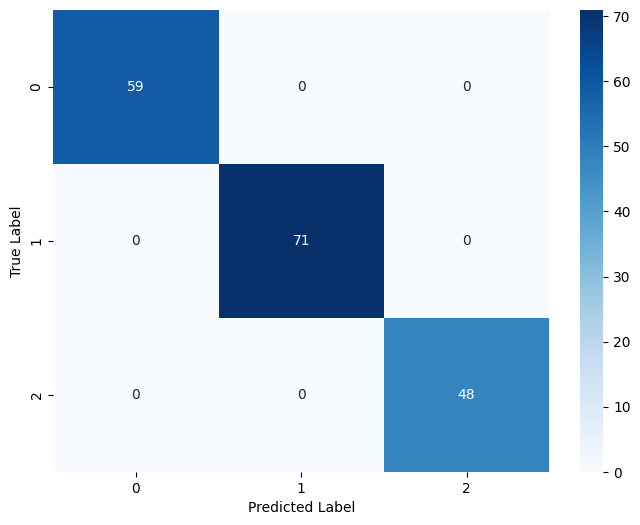

In [27]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(y1, y_pred)
sns.heatmap(cm, annot= True, fmt='d', cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [29]:
print(classification_report(y1, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        71
           3       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178

